In [1]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
pd.options.mode.chained_assignment = None



In [2]:
#identificação
acao = "VALE3.SA"
#data de início
inicio = "2014-12-31"
#data final
final = "2022-10-10"

dados_acao = pdr.get_data_yahoo(acao, inicio, final)

dados_acao

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,21.950001,21.059999,21.700001,21.280001,5658400.0,13.442643
2015-01-05,21.129999,20.510000,20.760000,20.959999,8603000.0,13.240495
2015-01-06,22.129999,21.070000,21.070000,21.799999,9879900.0,13.771127
2015-01-07,22.809999,21.969999,22.320000,22.600000,6130900.0,14.276492
2015-01-08,22.879999,22.110001,22.770000,22.840000,4667300.0,14.428101
...,...,...,...,...,...,...
2022-10-04,76.250000,74.059998,74.199997,75.790001,41717500.0,75.790001
2022-10-05,77.860001,76.120003,76.290001,76.959999,42621400.0,76.959999
2022-10-06,77.570000,74.919998,77.199997,75.230003,76852200.0,75.230003


In [3]:

cotacao = dados_acao['Close'].to_numpy().reshape(-1, 1)

cotacao

array([[21.28000069],
       [20.95999908],
       [21.79999924],
       ...,
       [75.23000336],
       [75.51000214],
       [73.98999786]])

In [4]:
tamanho_dados_treinamento = int(len(cotacao) * 0.8)

tamanho_dados_treinamento

1546

In [5]:
#escalar os dados entre 0 e 1, para deixar mais fácil o processamento
#dados em escala pré definidas são mais fáceis de lidar. 

escalador = MinMaxScaler(feature_range=(0, 1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])

dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento: , :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))
                                                

dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)

dados_entre_0_e_1

array([[0.13529663],
       [0.13188219],
       [0.14084506],
       ...,
       [0.71094754],
       [0.71393515],
       [0.69771658]])

In [6]:
dados_para_treinamento = dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

#dados que serão usados para gerar o resultado
treinamento_x = []
#cotação que aconteceu de fato
treinamento_y = []


for i in range(60, len(dados_para_treinamento)):

    #60 ultimos dias
    treinamento_x.append(dados_para_treinamento[i - 60: i, 0])
    #cotacao
    treinamento_y.append(dados_para_treinamento[i, 0])

    if i <= 61:

        print(treinamento_x)
        print(treinamento_y)



[array([0.13529663, 0.13188219, 0.14084506, 0.14938114, 0.15194195,
       0.14671362, 0.14980793, 0.14842083, 0.12910799, 0.1316688 ,
       0.14169866, 0.13924455, 0.14020486, 0.14383269, 0.14201877,
       0.12718737, 0.11715749, 0.11096884, 0.10979512, 0.10083225,
       0.10680751, 0.1188647 , 0.1309219 , 0.12750746, 0.12644047,
       0.12612036, 0.13860435, 0.12590695, 0.13337601, 0.13849765,
       0.14810072, 0.15055483, 0.1440461 , 0.14959454, 0.13892446,
       0.1434059 , 0.14447289, 0.13497652, 0.13497652, 0.12761416,
       0.1300683 , 0.12580025, 0.11630388, 0.11726419, 0.11673069,
       0.11203585, 0.10947504, 0.10947504, 0.10968842, 0.10990183,
       0.1203585 , 0.11726419, 0.11256935, 0.12430644, 0.12569354,
       0.11715749, 0.1190781 , 0.11011523, 0.10403329, 0.10691422])]
[0.09965855976331618]
[array([0.13529663, 0.13188219, 0.14084506, 0.14938114, 0.15194195,
       0.14671362, 0.14980793, 0.14842083, 0.12910799, 0.1316688 ,
       0.14169866, 0.13924455, 0.140

In [7]:
#transformando as listas em arrays e dando reshape 3d 

treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)

treinamento_x

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

treinamento_x

array([[[0.13529663],
        [0.13188219],
        [0.14084506],
        ...,
        [0.11011523],
        [0.10403329],
        [0.10691422]],

       [[0.13188219],
        [0.14084506],
        [0.14938114],
        ...,
        [0.10403329],
        [0.10691422],
        [0.09965856]],

       [[0.14084506],
        [0.14938114],
        [0.15194195],
        ...,
        [0.10691422],
        [0.09965856],
        [0.09539053]],

       ...,

       [[0.83866834],
        [0.84507046],
        [0.83504055],
        ...,
        [0.95283826],
        [0.93427234],
        [0.91954758]],

       [[0.84507046],
        [0.83504055],
        [0.83589418],
        ...,
        [0.93427234],
        [0.91954758],
        [0.90279555]],

       [[0.83504055],
        [0.83589418],
        [0.8403756 ],
        ...,
        [0.91954758],
        [0.90279555],
        [0.87985486]]])

In [8]:

#arquitetura de um deep learning
modelo = Sequential()


modelo.add(LSTM(50, return_sequences=True, input_shape = (treinamento_x.shape[1], 1)))
modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))

modelo.summary()
treinamento_x.shape[1]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


60

In [9]:

modelo.compile(optimizer="adam", loss="mean_squared_error") 

In [10]:

modelo.fit(treinamento_x, treinamento_y, batch_size=1, epochs=4)

Epoch 1/4
1486/1486 [==============================] - 22s 13ms/step - loss: 0.0016
Epoch 2/4
1486/1486 [==============================] - 21s 14ms/step - loss: 6.9614e-04
Epoch 3/4
1486/1486 [==============================] - 19s 13ms/step - loss: 5.7862e-04
Epoch 4/4
1486/1486 [==============================] - 19s 12ms/step - loss: 4.0203e-04


In [11]:

dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60:, :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento: , :] 

for i in range(60, len(dados_teste)):
    teste_x.append(dados_teste[i - 60: i, 0])
    

In [12]:
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [13]:
#predições do modelo

predicoes = modelo.predict(teste_x)

predicoes = escalador.inverse_transform(predicoes)

predicoes

13/13 [==============================] - 1s 8ms/step


array([[ 93.81872 ],
       [ 94.07148 ],
       [ 96.32985 ],
       [ 99.202156],
       [ 99.63892 ],
       [ 99.98765 ],
       [ 99.58103 ],
       [103.495094],
       [104.42682 ],
       [105.99805 ],
       [106.45369 ],
       [105.25071 ],
       [104.8105  ],
       [104.85024 ],
       [107.36583 ],
       [109.42221 ],
       [110.333405],
       [109.73203 ],
       [108.13347 ],
       [107.48567 ],
       [108.66843 ],
       [109.755424],
       [111.23605 ],
       [113.06783 ],
       [113.68545 ],
       [111.53716 ],
       [110.02414 ],
       [110.790504],
       [111.81321 ],
       [115.35505 ],
       [117.11406 ],
       [116.805534],
       [119.285706],
       [117.12456 ],
       [114.4368  ],
       [112.11679 ],
       [113.553696],
       [115.418396],
       [114.4256  ],
       [112.94172 ],
       [111.195366],
       [110.90887 ],
       [109.113754],
       [110.65971 ],
       [112.26211 ],
       [113.258156],
       [115.80546 ],
       [115.6

In [14]:
#pegando o erro médio quadrático (RMSE)

rmse = np.sqrt(np.mean(predicoes - teste_y) ** 2)
rmse

1.592589287178769

In [15]:
#criando o grafico do modelo


treinamento = dados_acao.iloc[:tamanho_dados_treinamento, :]
df_teste = pd.DataFrame({"Close": dados_acao['Close'].iloc[tamanho_dados_treinamento:],
                        "predicoes": predicoes.reshape(len(predicoes))})


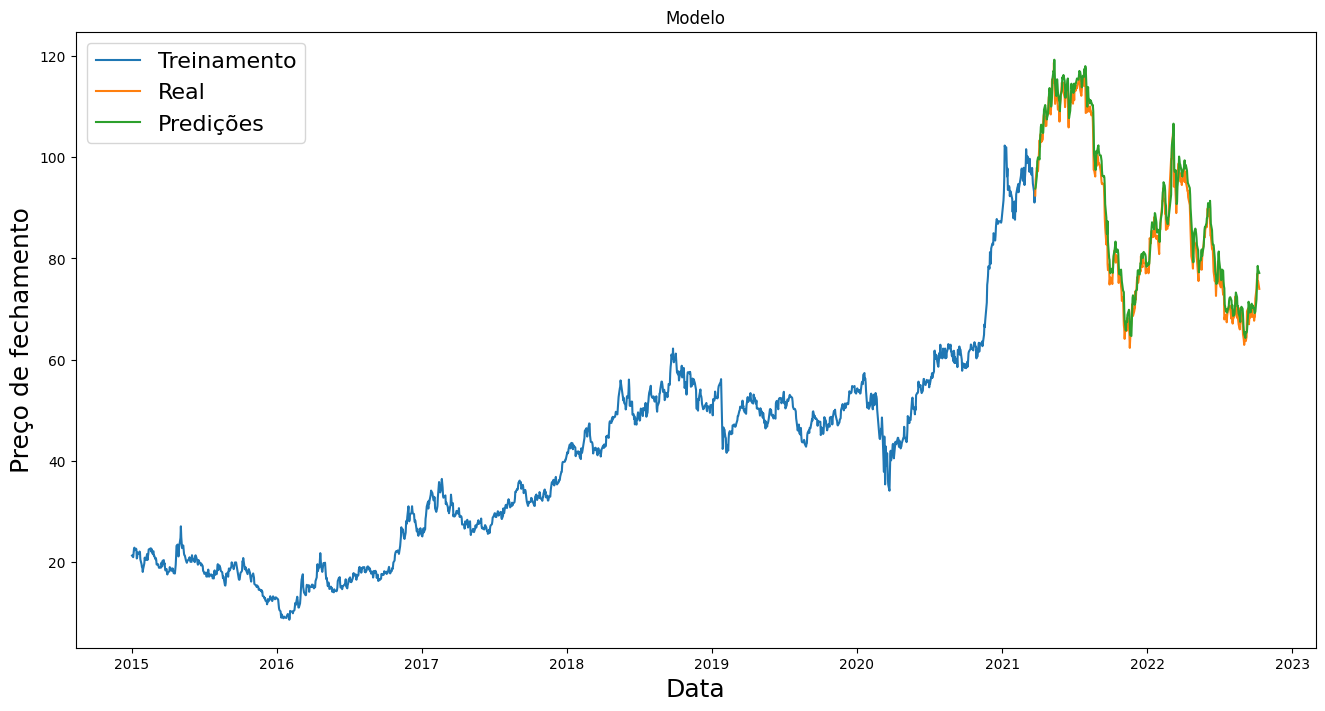

In [16]:
plt.figure(figsize =(16, 8))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel("Preço de fechamento", fontsize = 18)
plt.plot(treinamento['Close'])
plt.plot(df_teste[['Close', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})
plt.show()

In [17]:
df_teste.sort_index()

df_teste

,Close,predicoes
Date,,
2021-03-25,92.440002,93.818718
2021-03-26,95.529999,94.071480
2021-03-29,97.980003,96.329849
2021-03-30,97.070000,99.202156
2021-03-31,97.970001,99.638924
...,...,...
2022-10-04,75.790001,74.666870
2022-10-05,76.959999,76.969688
2022-10-06,75.230003,78.532913


In [18]:
#calcular media de acertos e expectativa de lucro

df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()

df_teste = df_teste.dropna()

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0, 
                                                      True, False)
df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0, 
                                                      True, False)

df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero'] == df_teste['var_modelo_maior_menor_que_zero']
                                      , True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste

,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
Date,,,,,,,,
2021-03-26,95.529999,94.071480,0.033427,0.002694,True,True,True,0.033427
2021-03-29,97.980003,96.329849,0.025646,0.024007,True,True,True,0.025646
2021-03-30,97.070000,99.202156,-0.009288,0.029817,False,True,False,0.009288
2021-03-31,97.970001,99.638924,0.009272,0.004403,True,True,True,0.009272
2021-04-01,97.389999,99.987648,-0.005920,0.003500,False,True,False,0.005920
...,...,...,...,...,...,...,...,...
2022-10-04,75.790001,74.666870,0.024189,0.037478,True,True,True,0.024189
2022-10-05,76.959999,76.969688,0.015437,0.030841,True,True,True,0.015437
2022-10-06,75.230003,78.532913,-0.022479,0.020310,False,True,False,0.022479


In [19]:
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])
errou_lado = 1 - acertou_lado

media_lucro = df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()

exp_mat_lucro = acertou_lado * media_lucro.iloc[1] - media_lucro.iloc[0] * errou_lado
ganho_sobre_perda = media_lucro.iloc[1]/ media_lucro.iloc[0]

print("Quantidade de vezes que acertou o lado em %: ", acertou_lado)
print("Ganho sobre perda: ",ganho_sobre_perda)
print("Expectativa matemática dos lucros: ", exp_mat_lucro*100)
print("Média do lucro: ", media_lucro)


Quantidade de vezes que acertou o lado em %:  0.5
Ganho sobre perda:  1.1804854714117379
Expectativa matemática dos lucros:  0.14933691729856585
Média do lucro:  acertou_o_lado
False    0.016548
True     0.019535
Name: variacao_percentual_acao_abs, dtype: float64


In [20]:
data_hoje = datetime.now()

#é possível escolher o dia através do código: data_hoje = datetime.now() - timedelta(days = 1)

if data_hoje.hour > 18:
    
    final = data_hoje
    inicial = datetime.now() - timedelta(days = 252)
    
else:
    final = data_hoje - timedelta(days = 1)
    inicial = datetime.now() - timedelta(days = 252)
    
cotacoes = pdr.get_data_yahoo(acao, inicial, final) 
ultimos_60_dias = cotacoes['Close'].iloc[-60:].values.reshape(-1, 1)

ultimos_60_dias_escalado = escalador.transform(ultimos_60_dias)

teste_x = []
teste_x.append(ultimos_60_dias_escalado)
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

previsao_de_preco = modelo.predict(teste_x)
previsao_de_preco = escalador.inverse_transform(previsao_de_preco)

print(previsao_de_preco)

1/1 [==============================] - 0s 17ms/step
[[70.16615]]


In [21]:
dados_acao

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,21.950001,21.059999,21.700001,21.280001,5658400.0,13.442643
2015-01-05,21.129999,20.510000,20.760000,20.959999,8603000.0,13.240495
2015-01-06,22.129999,21.070000,21.070000,21.799999,9879900.0,13.771127
2015-01-07,22.809999,21.969999,22.320000,22.600000,6130900.0,14.276492
2015-01-08,22.879999,22.110001,22.770000,22.840000,4667300.0,14.428101
...,...,...,...,...,...,...
2022-10-04,76.250000,74.059998,74.199997,75.790001,41717500.0,75.790001
2022-10-05,77.860001,76.120003,76.290001,76.959999,42621400.0,76.959999
2022-10-06,77.570000,74.919998,77.199997,75.230003,76852200.0,75.230003
